<a href="https://www.kaggle.com/code/tanakataro73/kaggle-book-shinoda-chapter-0401-0412-house-prices?scriptVersionId=170008110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 4.1~ ベースライン

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
%config Completer.use_jedi = False

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import random
np.random.seed(1234)
random.seed(1234)

In [5]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
train_df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [9]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [10]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# カテゴリ変数確認
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat] = all_df[cat].fillna("missing")
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [14]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [15]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [16]:
import lightgbm as lgb

In [17]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [18]:
lgbm_params = {
    "objective": "regression",
    "random_seed": 1234,
    'early_stopping_round': 20,
#     "max_bin": 331,
#     "num_leaves": 20,
#     "min_data_in_leaf": 57,
#     "verbose": -1,
}

In [19]:
train_X = train_df_le.drop(["Id", "SalePrice"], axis=1)
train_Y = train_df_le["SalePrice"]

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.58367e+09
[20]	valid_0's l2: 7.52944e+08
[30]	valid_0's l2: 5.90683e+08
[40]	valid_0's l2: 5.50125e+08
[50]	valid_0's l2: 5.43763e+08
[60]	valid_0's l2: 5.40166e+08
[70]	valid_0's l2: 5.45038e+08
Early stopping, best iteration is:
[55]	valid_0's l2: 5.37132e+08
0.12800381488672496
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[

In [22]:
from statistics import mean

In [23]:
# ベースラインのRMSE
mean(rmses)

0.1352849504777467

In [24]:
actual_pred_df = pd.DataFrame({"actual": train_Y, "pred": oof})

<Axes: >

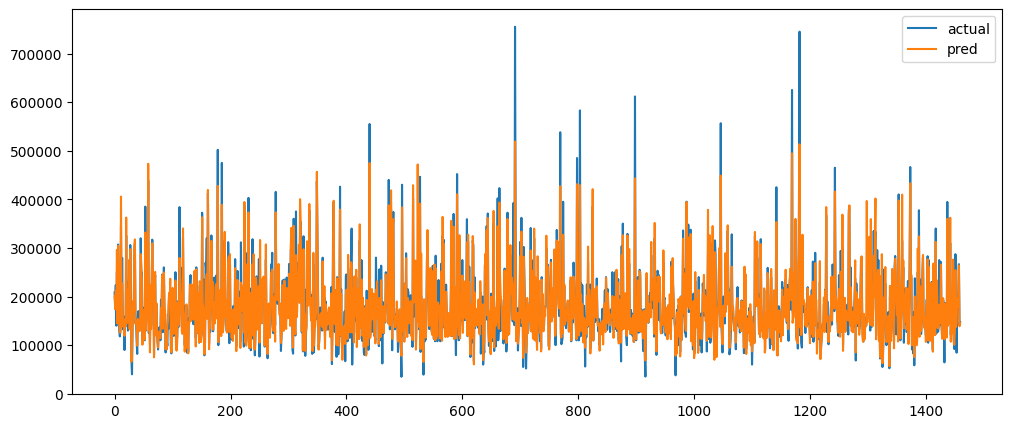

In [25]:
actual_pred_df.plot(figsize=(12, 5))

In [26]:
actual_pred_df.head()

,actual,pred
0,208500.0,200129.223931
1,181500.0,173777.759823
2,223500.0,211386.782962
3,140000.0,182023.095949
4,250000.0,296032.897046


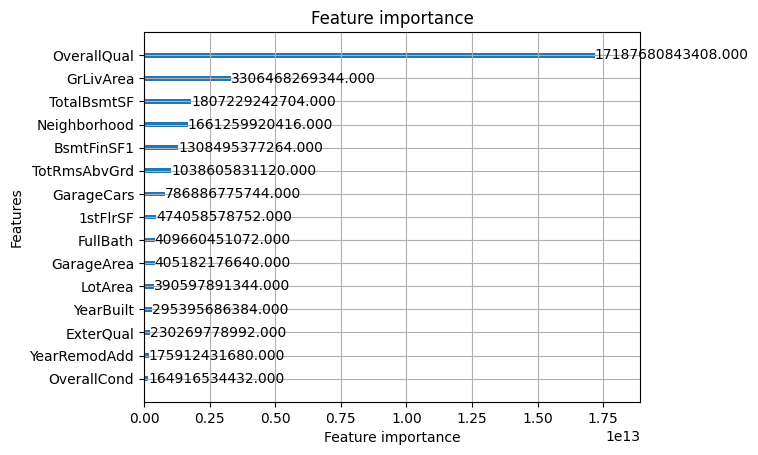

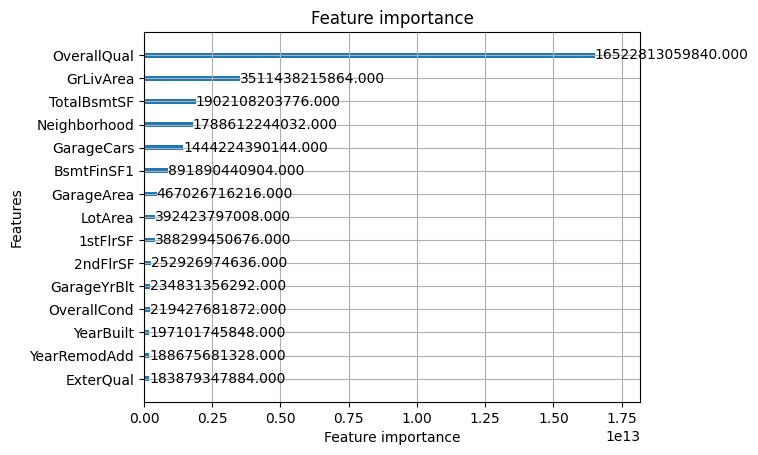

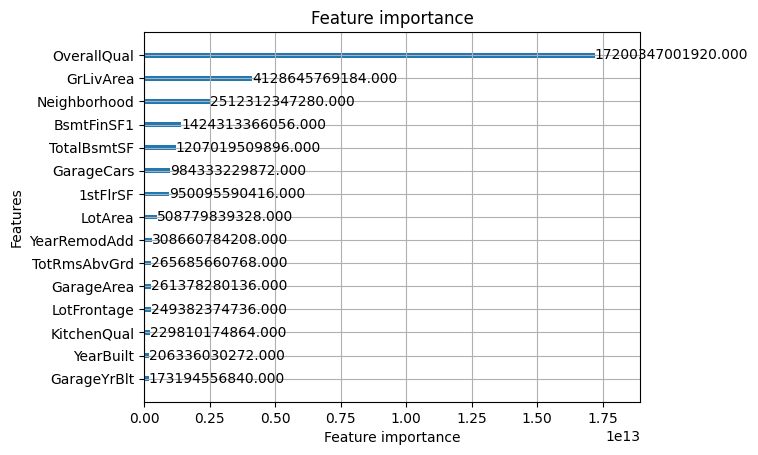

In [27]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

# 4.5 目的変数の前処理: 目的変数の分布確認、対数化

In [28]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

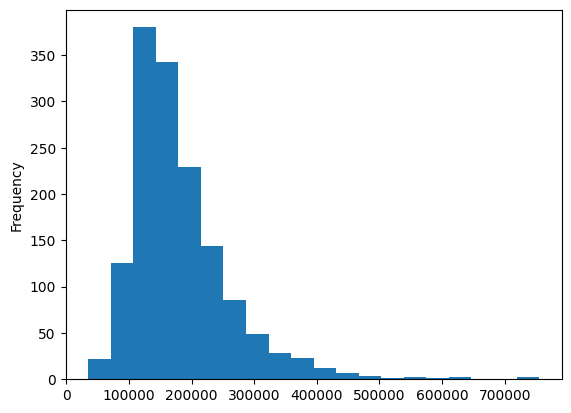

In [29]:
train_df["SalePrice"].plot.hist(bins=20)

In [30]:
# 評価指標が対数を取って計算するため、SalePriceを対数化
np.log(train_df["SalePrice"])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

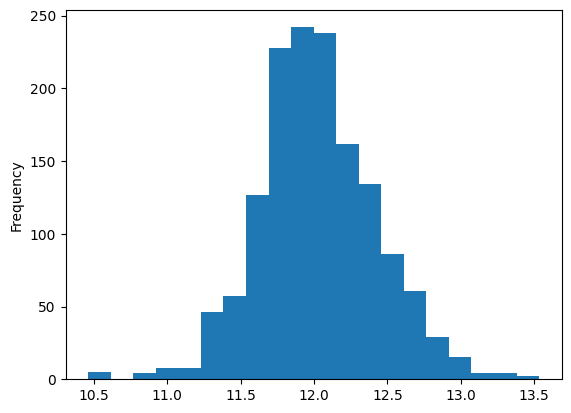

In [31]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [32]:
# 対数化による予測精度向上を確認
train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])

In [33]:
train_df_le.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,3,65.0,8450,1,2,3,3,0,...,3,4,4,0,2,2008,8,4,208500.0,12.247694
1,2,20,3,80.0,9600,1,2,3,3,0,...,3,4,4,0,5,2007,8,4,181500.0,12.109011
2,3,60,3,68.0,11250,1,2,0,3,0,...,3,4,4,0,9,2008,8,4,223500.0,12.317167
3,4,70,3,60.0,9550,1,2,0,3,0,...,3,4,4,0,2,2006,8,0,140000.0,11.849398
4,5,60,3,84.0,14260,1,2,0,3,0,...,3,4,4,0,12,2008,8,4,250000.0,12.429216


In [34]:
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [35]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0436707
[20]	valid_0's l2: 0.0222385
[30]	valid_0's l2: 0.0180434
[40]	valid_0's l2: 0.016907
[50]	valid_0's l2: 0.0165714
[60]	valid_0's l2: 0.0163693
[70]	valid_0's l2: 0.0162283
[80]	valid_0's l2: 0.0161985
[90]	valid_0's l2: 0.0160713
[100]	valid_0's l2: 0.0161346
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 0.0160713
0.12677276183461025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_row_wise=true` to remove

In [36]:
# 目的変数を対数化したあとのRMSE
mean(rmses)

0.13179298123488878

# 4.6 説明変数の前処理: 欠損値確認 際立って欠損が多いカラムをまとめる

In [37]:
# all_dfを再作成
# カテゴリ変数をオリジナルの値に戻す
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [38]:
# カテゴリ変数確認
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
all_df.isnull().sum().sort_values(ascending=False).head(50)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
Utilities           2
BsmtHalfBath        2
Electrical          1
TotalBsmtSF         1
BsmtUnfSF           1
KitchenQual         1
BsmtFinSF2          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
Exterior2nd         1
Exterior1st         1
GarageArea          1
YrSold              0
Fireplaces          0
MoSold              0
MiscVal             0
SaleCondition       0
TotRmsAbvGrd        0
PoolArea            0
3SsnPorch           0
ScreenPorch         0
EnclosedPorch       0
OpenPorchS

In [40]:
# PoolQC, MiscFeature, Alley は欠損値が多いので、高級設備の有無という変数にまとめて変換していく
all_df.PoolQC.value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64

In [41]:
HighFacility_col = ["PoolQC", "MiscFeature", "Alley"]
for col in HighFacility_col:
    if all_df[col].dtype == "object" and len(all_df[all_df[col].isnull()]) > 0:        
        all_df.loc[~all_df[col].isnull(), col] = 1
        all_df.loc[all_df[col].isnull(), col] = 0

In [42]:
all_df.PoolQC.value_counts()

PoolQC
0    2909
1      10
Name: count, dtype: int64

In [43]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [44]:
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)

In [45]:
all_df["hasHighFacility"].value_counts()

hasHighFacility
0    2615
1     295
2       9
Name: count, dtype: int64

In [46]:
# 元の変数は削除
all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis=1)

# 4.7 外れ値を除外

In [47]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [48]:
# 数値データのみを抜き出す
train_df_num = train_df.select_dtypes(include=[np.number])

In [49]:
train_df_num.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [50]:
train_df_num.YearBuilt.value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

In [51]:
# 比例尺度(ratio scale)ではないもの
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]

In [52]:
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [53]:
# 比例尺度の列のみを抜き出す
train_df_num_rs = train_df_num[num_features]

In [54]:
# 3/4分位数が0、つまり全体の75%以上が0となるカラム
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        # カラム名と0の行数
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


Porch, Bath, Pool などは、面積等よりも存在するかどうかが重要そう

In [55]:
# 特定の値しか取らないものを確認
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


In [56]:
# カラムごとの外れ値の個数を確認
# 外れ値は「平均から標準偏差3倍の範囲に入ってないもの」
for col in num_features:
    ser = train_df_num_rs[col]
    outlier_df = train_df_num_rs[(ser > ser.mean() + ser.std()*3) | (ser < ser.mean() - ser.std()*3)]
    print(col, len(outlier_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

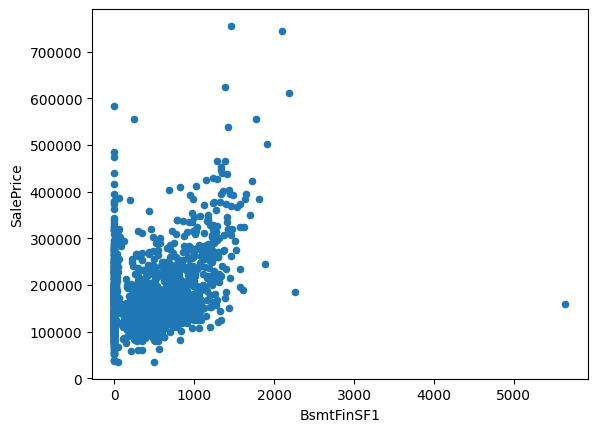

In [57]:
# BsmtFinSF1 について散布図を見る
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [58]:
# 右下の外れ値を確認
all_df[all_df["BsmtFinSF1"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

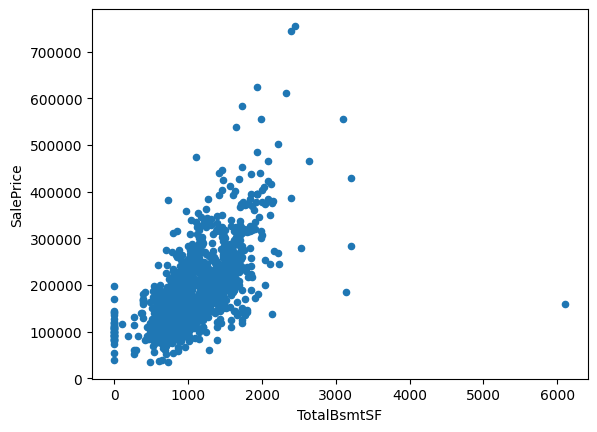

In [59]:
# TotalBsmtSF の散布図
all_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [60]:
# 右下の外れ値を確認
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

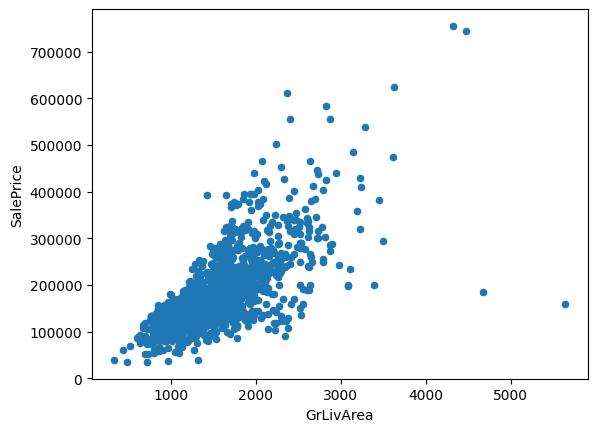

In [61]:
# GrLivArea （地上居住面積）の散布図
all_df.plot.scatter(x="GrLivArea", y="SalePrice")

In [62]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

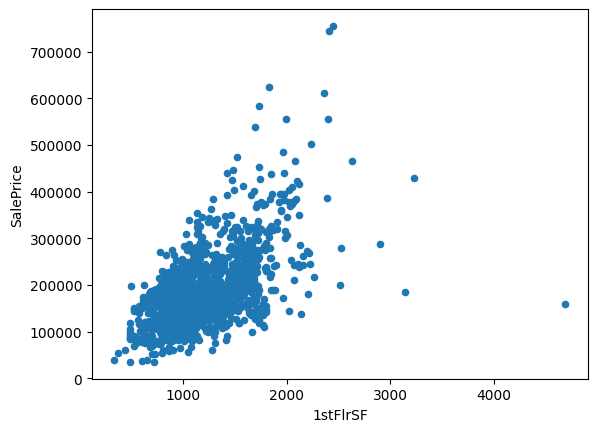

In [63]:
# 1stFlrSF 1階の面積の散布図
all_df.plot.scatter(x="1stFlrSF", y="SalePrice")

In [64]:
all_df[all_df["1stFlrSF"] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='LotArea', ylabel='SalePrice'>

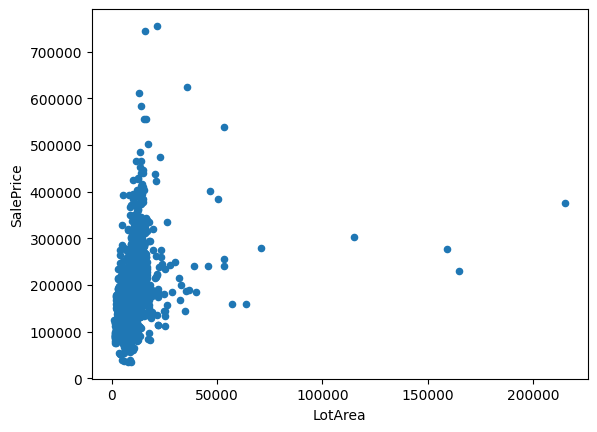

In [65]:
# 敷地面積
all_df.plot.scatter(x="LotArea", y="SalePrice")

In [66]:
# 「外れ値以外 または　テストデータ」を残す（それ以外を除外）
# 上記の散布図を参考に閾値をもうけた
print(len(all_df))

col_threshold = {
    "BsmtFinSF1": 2000,
    "TotalBsmtSF": 3000,
    "GrLivArea": 4500,
    "1stFlrSF": 2500,
    "LotArea": 100000,
}

for col, threshold in col_threshold.items():
    all_df = all_df[(all_df[col] < threshold) | (all_df["SalePrice"].isnull())]
    
print(len(all_df))

2919
2904


## ここまで前処理してきたデータで再度RMSEを計算

In [67]:
# 高級設備としてまとめたカラムをdrop
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [68]:
categories

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [69]:
# ラベルエンコーディング
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat] = all_df[cat].fillna("missing")
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

print(all_df.dtypes)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
Id                    int64
MSSubClass            int64
MSZoning           category
LotFrontage         float64
LotArea               int64
                     ...   
YrSold                int64
SaleType           category
SaleCondition      category
SalePrice           float64
hasHighFacility       int64
Length: 79, dtype: object


In [70]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [71]:
train_Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

In [72]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2948
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0423077
[20]	valid_0's l2: 0.0217695
[30]	valid_0's l2: 0.017511
[40]	valid_0's l2: 0.0162447
[50]	valid_0's l2: 0.0161528
[60]	valid_0's l2: 0.0160055
[70]	valid_0's l2: 0.0160335
[80]	valid_0's l2: 0.0160276
[90]	valid_0's l2: 0.0160347
[100]	valid_0's l2: 0.0160414
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.0159996
0.12648953494655646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove

In [73]:
mean(rmses)

0.1295664437889394

# 4.8 説明変数の確認： 特徴量生成

大きく以下のカラムがある

- 時間
- 広さ
- 設備数・許容数
- 品質・分類

以下のような特徴量生成が考えられる

- 建築年から販売年までの経過年数（築何年か）
- 1部屋あたりの広さ

In [74]:
# 時間系のカラムの統計量
all_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [75]:
# 建築年から販売年までの経過年数（築何年か）
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]

In [76]:
# 再度検証を行う
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

mean(rmses)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3045
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 73
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.042401
[20]	valid_0's l2: 0.021746
[30]	valid_0's l2: 0.0174195
[40]	valid_0's l2: 0.0162542
[50]	valid_0's l2: 0.0159732
[60]	valid_0's l2: 0.0158821
[70]	valid_0's l2: 0.0158668
[80]	valid_0's l2: 0.0158347
Early stopping, best iteration is:
[62]	valid_0's l2: 0.0158329
0.12582876406357282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

0.12936893883978604

In [77]:
# 広さに関するカラム
print(all_df.columns)
area_columns = all_df.columns[(all_df.columns.str.contains("Area")) | (all_df.columns.str.contains("SF")) | (all_df.columns.str.contains("Porch")) | (all_df.columns.str.contains("Area")) | (all_df.columns == "LotFrontage")]
all_df[area_columns].describe()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,2425.000000,2904.000000,2882.000000,2903.000000,2903.000000,2903.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,69.071340,9912.604683,101.191187,434.926628,49.016879,559.850499,1043.794006,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025
std,22.662001,5178.128224,177.804595,440.128728,168.444473,438.438879,420.008348,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7448.250000,0.000000,0.000000,0.000000,220.000000,791.500000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,9422.000000,0.000000,365.000000,0.000000,467.000000,988.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11503.000000,164.000000,728.500000,0.000000,802.500000,1296.000000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000
max,313.000000,70761.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000


In [78]:
# トータルの広さ
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
# お風呂数合計
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df["HalfBath"] + all_df["BsmtFullBath"] + all_df["BsmtHalfBath"]

In [79]:
# Porchの広さの合計
all_df["Total_PorchSF"] = all_df["WoodDeckSF"] + all_df["OpenPorchSF"] + all_df["EnclosedPorch"] + all_df["3SsnPorch"] + all_df["ScreenPorch"]

In [80]:
# Porchの広さをPorchの有無に変換
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop("Total_PorchSF", axis=1)

In [81]:
all_df["hasPorch"].value_counts()

hasPorch
1    2424
0     480
Name: count, dtype: int64

In [82]:
# 再度検証を行う
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

mean(rmses)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3309
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 76
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0383743
[20]	valid_0's l2: 0.0198815
[30]	valid_0's l2: 0.0164664
[40]	valid_0's l2: 0.0156914
[50]	valid_0's l2: 0.0154145
[60]	valid_0's l2: 0.0154487
Early stopping, best iteration is:
[48]	valid_0's l2: 0.0154024
0.12410644096766074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info

0.12715852593003876

# 4.9 ハイパーパラメータを最適化する

以下を最適化する

- num_leaves
- max_bin
  - 一つの分岐に入るデータ数の最大値を指定
- bagging_fraction
  - baggingで選択されるサンプルの割合です。default 1.0で、baggingは無効化されています。また、baggingするには"bagging_freq"も正の値にしなくてはなりません。
- bagging_freq
  - 何回に一回baggingするかです。こちらだけセットしてもやはりbaggingは出来ず、baggingするには"bagging_fraction"が1未満である必要があります。
- feature_fraction
  - 1.0未満の値にすると、特徴量の一部を削減して学習を行う用になります。default 1.0です。
- min_data_in_leaf
- min_sum_hessian_in_leaf

参考:
- https://qiita.com/nabenabe0928/items/6b9772131ba89da00354#max_bin
- https://zenn.dev/mosamosa/articles/07d0076c9292136a3639

これまでより長く細かく学習させるため、以下のように固定

- learning_rate を0.05
- n_estimators を1000

参考: https://knknkn.hatenablog.com/entry/2021/06/29/125226

optunaについて
- https://www.salesanalytics.co.jp/datascience/datascience073/

In [83]:
import optuna

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [86]:
def objective(trial):
    params = {
        "objective": "regression",
        "random_seed": 1234,
        "early_stopping_round": 20,
        "learning_rate": 0.05,
        "n_estimators": 1000,
        "num_leaves": trial.suggest_int("num_leaves", 4, 64),
        "max_bin": trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 0.9),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 0.9),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf": trial.suggest_int("min_sum_hessian_in_leaf", 1, 10),
    }

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [87]:
%%script false --no-raise-error
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

In [88]:
# 得られたハイパーパラメータでクロスバリデーション
lgbm_params = {
    "objective": "regression",
    "random_seed": 1234,
    "early_stopping_round": 20,
    "learning_rate": 0.05,
    "n_estimators": 1000,
    "num_leaves": 33,
    "max_bin": 125,
    "bagging_fraction": 0.7197362581993618,
    "bagging_freq": 4,
    'feature_fraction': 0.4684501358427995,
    'min_data_in_leaf': 14,
    'min_sum_hessian_in_leaf': 2,
}

In [89]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, callbacks=[lgb.log_evaluation(period=10)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

mean(rmses)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2373
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 77
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0731662
[20]	valid_0's l2: 0.0394199
[30]	valid_0's l2: 0.0263232
[40]	valid_0's l2: 0.0197958
[50]	valid_0's l2: 0.0167544
[60]	valid_0's l2: 0.0152337
[70]	valid_0's l2: 0.0145741
[80]	valid_0's l2: 0.0141101
[90]	valid_0's l2: 0.0139141
[100]	valid_0's l2: 0.0137532
[110]	valid_0's l2: 0.0137641
[120]	valid_0's l2: 0.0136265
[130]	valid_0's l2: 0.0135646
[140]	valid_0's l2: 0.0135529
[150]	valid_0's l2: 0.0135208
[160]	valid_0's l2: 0.013545
[170]	valid_0's l2: 0.0135824
Early stopping, best iteration is:

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 78
[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0832478
[20]	valid_0's l2: 0.0494187
[30]	valid_0's l2: 0.0337324
[40]	valid_0's l2: 0.0266851
[50]	valid_0's l2: 0.0231906
[60]	valid_0's l2: 0.0213638
[70]	valid_0's l2: 0.0201457
[80]	valid_0's l2: 0.0194877
[90]	valid_0's l2: 0.0190256
[100]	valid_0's l2: 0.0187978
[110]	valid_0's l2: 0.0186239
[120]	valid_0's l2: 0.0185446
[130]	valid_0's l2: 0.0184601
[140]	valid_0's l2: 0.0184065
[150]	valid_0's l2: 0.018314
[160]	valid_0's l2: 0.0182533
[170]	valid_0's l2: 0.0182171
[180]	valid_0's l2: 0.0181544
[190

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	valid_0's l2: 0.0368451
[30]	valid_0's l2: 0.0242847
[40]	valid_0's l2: 0.0184089
[50]	valid_0's l2: 0.0157186
[60]	valid_0's l2: 0.0144352
[70]	valid_0's l2: 0.0138335
[80]	valid_0's l2: 0.0135654
[90]	valid_0's l2: 0.0134322
[100]	valid_0's l2: 0.0133707
[110]	valid_0's l2: 0.0132919
[120]	valid_0's l2: 0.0131674
[130]	valid_0's l2: 0.0130868
[140]	valid_0's l2: 0.0130366
[150]	valid_0's l2: 0.0129945
[160]	valid_0's l2: 0.0130438
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0129672
0.11387357100745589


0.12149147826048827

In [90]:
# 結果をsubmitする
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [91]:
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [92]:
preds_array = np.array(preds)

In [93]:
preds_mean = np.mean(preds_array, axis=0)

In [94]:
preds_exp = np.exp(preds_mean)

In [95]:
submission["SalePrice"] = preds_exp

In [96]:
submission["SalePrice"].describe()

count      1459.000000
mean     177399.658685
std       74955.449980
min       53138.658720
25%      127503.678109
50%      157833.462149
75%      208132.807092
max      479249.133918
Name: SalePrice, dtype: float64

In [97]:
submission.to_csv("kaggle_book_shinoda_chapter_0409_house_prices_submit01.csv", index=False)

# 4.10 ランダムフォレスト、XGBoost

## ランダムフォレスト

LightGBMなどとの予測結果と組み合わせるため、ランダムフォレストを実装

In [98]:
from sklearn.ensemble import RandomForestRegressor as rf

ランダムフォレストは欠損値をそのまま扱うことはできないので、確認する

In [99]:
hasnan_cat = []

for col in all_df.columns:
    null_count = all_df[col].isnull().sum()
    if null_count > 0 and col != "SalePrice":
        print(col, null_count)
        hasnan_cat.append(col)

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [100]:
all_df[hasnan_cat].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,TotalSF,Total_Bathrooms
count,2425.000000,2882.000000,2903.000000,2903.000000,2903.000000,2903.000000,2902.000000,2902.000000,2745.000000,2903.000000,2903.000000,2903.000000,2902.000000
mean,69.071340,101.191187,434.926628,49.016879,559.850499,1043.794006,0.426258,0.061337,1978.061202,1.763348,471.632794,2533.060971,2.431771
std,22.662001,177.804595,440.128728,168.444473,438.438879,420.008348,0.522410,0.245667,25.600996,0.761410,214.551791,764.699033,0.937184
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,334.000000,1.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,791.500000,0.000000,0.000000,1960.000000,1.000000,319.500000,1998.500000,2.000000
50%,68.000000,0.000000,365.000000,0.000000,467.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,478.000000,2444.000000,2.000000
75%,80.000000,164.000000,728.500000,0.000000,802.500000,1296.000000,1.000000,0.000000,2002.000000,2.000000,576.000000,2985.000000,3.000000
max,313.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,10190.000000,8.000000


半分以上が0であるカラムもあるため、平均値ではなく中央値で欠損値補完を行う。

In [101]:
for col in hasnan_cat:
    all_df[col] = all_df[col].fillna(all_df[col].median())
    print(col, all_df[col].isnull().sum())

LotFrontage 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
BsmtFullBath 0
BsmtHalfBath 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
TotalSF 0
Total_Bathrooms 0


In [102]:
# ランダムフォレストの学習・予測
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le.loc[:, ["SalePrice_log"]] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

folds = 3
kf = KFold(n_splits=folds)

models_rf = []
rmses_rf = []
oof_rf = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    model_rf = rf(n_estimators=50, random_state=1234)
    model_rf.fit(X_train, y_train)
    
    y_pred = model_rf.predict(X_valid)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models_rf.append(model_rf)
    rmses_rf.append(tmp_rmse)
    oof_rf[val_index] = y_pred

mean(rmses_rf)

0.13939197713830098
0.14198636310245238
0.12935625060296438


0.13691153028123926

In [103]:
# テストデータで各クロスバリデーションのモデルで予測
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

preds_rf = []
for model in models_rf:
    pred = model.predict(test_X)
    preds_rf.append(pred)

In [104]:
preds_rf

[array([11.75496532, 11.92936754, 12.05428427, ..., 11.96016657,
        11.64332129, 12.33692056]),
 array([11.75698295, 11.96912356, 12.09629845, ..., 11.89917713,
        11.62650455, 12.32502104]),
 array([11.72419734, 11.96374942, 12.08839376, ..., 11.92449559,
        11.70311643, 12.35322513])]

In [105]:
preds_array_rf = np.array(preds_rf)

In [106]:
preds_mean_rf = np.mean(preds_array_rf, axis=0)
preds_exp_rf = np.exp(preds_mean_rf)

In [107]:
submission["SalePrice"] = preds_exp_rf

In [108]:
submission.to_csv("kaggle_book_shinoda_chapter_0410_house_prices_submit02_rf.csv", index=False)

## XGBoost

>XGBoostは最後の予測結果の組み合わせに活用されることが多い

とのこと

In [109]:
import xgboost as xgb

XGBoostはcategory型を読み込めないのでintに変換する必要があるとのこと

In [110]:
categories = train_X.columns[train_X.dtypes == "category"]

In [111]:
categories

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [112]:
for col in categories:
    train_X[col] = train_X[col].astype("int8")
    test_X[col] = test_X[col].astype("int8")

### ハイパーパラメータチューニング

In [113]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [114]:
def objective(trial):
    xgb_params = {
        "learning_rate": 0.05,
        "seed": 1234,
        "max_depth": trial.suggest_int("max_depth", 3, 16),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 0.9),
        "subsample": trial.suggest_float("subsample", 0.2, 0.9),
    }
    
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    
    model_xgb = xgb.train(xgb_params, xgb_train, evals=evals, num_boost_round=1000, early_stopping_rounds=20, verbose_eval=10)
    y_pred = model_xgb.predict(xgb_eval)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [115]:
%%script false --no-raise-error
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

In [116]:
# Optunaの結果からハイパーパラメータ設定
xgb_params = {
    "learning_rate": 0.05,
    "seed": 1234,
    "max_depth": 6,
    "colsample_bytree": 0.5264175409994144,
    "subsample": 0.37109791440112194,
}

In [117]:
# XGBoostの学習・予測
models_xgb = []
rmses_xgb = []
oof_xgb = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    
    model_xgb = xgb.train(xgb_params, xgb_train, evals=evals, num_boost_round=1000, early_stopping_rounds=20, verbose_eval=20)
    y_pred = model_xgb.predict(xgb_eval)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models_xgb.append(model_xgb)
    rmses_xgb.append(tmp_rmse)
    oof_xgb[val_index] = y_pred

mean(rmses_xgb)

[0]	train-rmse:0.37525	eval-rmse:0.38324
[20]	train-rmse:0.18761	eval-rmse:0.20285
[40]	train-rmse:0.11585	eval-rmse:0.14384
[60]	train-rmse:0.08576	eval-rmse:0.12504
[80]	train-rmse:0.07165	eval-rmse:0.11814
[100]	train-rmse:0.06364	eval-rmse:0.11491
[120]	train-rmse:0.05755	eval-rmse:0.11355
[140]	train-rmse:0.05244	eval-rmse:0.11340
[160]	train-rmse:0.04809	eval-rmse:0.11333
[165]	train-rmse:0.04708	eval-rmse:0.11327
0.11326586554835465
[0]	train-rmse:0.37193	eval-rmse:0.38859
[20]	train-rmse:0.18268	eval-rmse:0.22091
[40]	train-rmse:0.11160	eval-rmse:0.16563
[60]	train-rmse:0.08311	eval-rmse:0.14549
[80]	train-rmse:0.06866	eval-rmse:0.13764
[100]	train-rmse:0.06065	eval-rmse:0.13356
[120]	train-rmse:0.05518	eval-rmse:0.13194
[140]	train-rmse:0.05060	eval-rmse:0.13061
[160]	train-rmse:0.04653	eval-rmse:0.12880
[180]	train-rmse:0.04248	eval-rmse:0.12861
[200]	train-rmse:0.03914	eval-rmse:0.12820
[220]	train-rmse:0.03632	eval-rmse:0.12795
[240]	train-rmse:0.03359	eval-rmse:0.12774
[24

0.118579829554524

In [118]:
# テストデータで予測値を算出
xgb_test = xgb.DMatrix(test_X)

In [119]:
preds_xgb = []
for model in models_xgb:
    pred = model.predict(xgb_test)
    preds_xgb.append(pred)

In [120]:
preds_array_xgb= np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis=0)
preds_exp_xgb = np.exp(preds_mean_xgb)
submission["SalePrice"] = preds_exp_xgb

In [121]:
submission

,Id,SalePrice
0,1461,125492.664062
1,1462,160796.062500
2,1463,183557.828125
3,1464,189597.078125
4,1465,184497.828125
...,...,...
1454,2915,84755.304688
1455,2916,82062.710938
1456,2917,146896.000000
1457,2918,118010.937500


In [122]:
submission.to_csv("kaggle_book_shinoda_chapter_0410_house_prices_submit03_xgb.csv", index=False)

## XGBoostとLightGBMの結果を組み合わせる

In [123]:
preds_ans = preds_exp_xgb * 0.5 + preds_exp * 0.5

In [124]:
submission["SalePrice"] = preds_ans

In [125]:
submission.to_csv("kaggle_book_shinoda_chapter_0410_house_prices_submit04_ensemble.csv", index=False)

# 4.11 追加分析１ クラスタ分析

In [126]:
# まずは欠損値のある行を削除
train_df_le_dn = train_df_le.dropna()

In [127]:
train_df_le_dn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,1,60,3,65.0,8450,1,3,3,0,4,...,2008,8,4,208500.0,0,5,2566.0,4.0,1,12.247694
1,2,20,3,80.0,9600,1,3,3,0,2,...,2007,8,4,181500.0,0,31,2524.0,3.0,1,12.109011
2,3,60,3,68.0,11250,1,0,3,0,4,...,2008,8,4,223500.0,0,7,2706.0,4.0,1,12.317167
3,4,70,3,60.0,9550,1,0,3,0,0,...,2006,8,0,140000.0,0,91,2473.0,2.0,1,11.849398
4,5,60,3,84.0,14260,1,0,3,0,2,...,2008,8,4,250000.0,0,8,3343.0,4.0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,2007,8,4,175000.0,0,8,2600.0,3.0,1,12.072541
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,2010,8,4,210000.0,0,32,3615.0,3.0,1,12.254863
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,2010,8,4,266500.0,1,69,3492.0,2.0,1,12.493130
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,2010,8,4,142125.0,0,60,2156.0,2.0,1,11.864462


In [128]:
# 広さや年数など様々な次元のデータが含まれるので、まずはデータを標準化（平均0,分散1）する
from sklearn import preprocessing

In [129]:
train_scaled = preprocessing.scale(train_df_le_dn.drop(["Id"], axis=1))

In [130]:
train_scaled

array([[ 0.06961655, -0.04576815, -0.20634574, ...,  1.73609279,
         0.45960003,  0.58679504],
       [-0.87716853, -0.04576815,  0.51294406, ...,  0.64013207,
         0.45960003,  0.2338818 ],
       [ 0.06961655, -0.04576815, -0.06248778, ...,  1.73609279,
         0.45960003,  0.7635842 ],
       ...,
       [ 0.30631282, -0.04576815, -0.15839309, ..., -0.45582865,
         0.45960003,  1.21136395],
       [-0.87716853, -0.04576815, -0.06248778, ..., -0.45582865,
         0.45960003, -0.38843119],
       [-0.87716853, -0.04576815,  0.27318079, ...,  0.64013207,
         0.45960003, -0.29396731]])

In [131]:
# DataFrameに戻す
train_scaled_df = pd.DataFrame(train_scaled)
train_scaled_df.columns = train_df_le_dn.drop(["Id"], axis=1).columns

In [132]:
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,0.069617,-0.045768,-0.206346,-0.288764,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.139388,0.312223,0.207359,0.387825,-0.325762,-1.046470,0.038930,1.736093,0.4596,0.586795
1,-0.877169,-0.045768,0.512944,-0.075476,0.058926,0.744525,0.310054,-0.026316,-0.634124,-0.222579,...,-0.612163,0.312223,0.207359,0.031995,-0.325762,-0.188288,-0.017716,0.640132,0.4596,0.233882
2,0.069617,-0.045768,-0.062488,0.230544,0.058926,-1.387256,0.310054,-0.026316,0.601627,-0.222579,...,0.139388,0.312223,0.207359,0.585509,-0.325762,-0.980456,0.227753,1.736093,0.4596,0.763584
3,0.306313,-0.045768,-0.446109,-0.084750,0.058926,-1.387256,0.310054,-0.026316,-1.869875,-0.222579,...,-1.363715,0.312223,-3.446710,-0.514930,-0.325762,1.792130,-0.086502,-0.455829,0.4596,-0.426767
4,0.069617,-0.045768,0.704755,0.788800,0.058926,-1.387256,0.310054,-0.026316,-0.634124,-0.222579,...,0.139388,0.312223,0.207359,0.934750,-0.325762,-0.947449,1.086897,1.736093,0.4596,1.048721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.069617,-0.045768,-0.350204,-0.387617,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.612163,0.312223,0.207359,-0.053668,-0.325762,-0.947449,0.084787,0.640132,0.4596,0.141076
1441,-0.877169,-0.045768,0.752707,0.587568,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,0.407594,-0.325762,-0.155281,1.453753,0.640132,0.4596,0.605037
1442,0.306313,-0.045768,-0.158393,-0.178967,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,1.152202,2.854821,1.065977,1.287858,-0.455829,0.4596,1.211364
1443,-0.877169,-0.045768,-0.062488,-0.053777,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,-0.486925,-0.325762,0.768914,-0.514051,-0.455829,0.4596,-0.388431


In [133]:
from sklearn.cluster import KMeans
# k-meansの結果を固定化
np.random.seed(1234)

In [134]:
house_cluster = KMeans(n_clusters=4).fit_predict(train_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
pd.Series(house_cluster).value_counts()

0    497
1    385
2    341
3    222
Name: count, dtype: int64

In [136]:
# 家ごとのクラスタ情報を付与
train_scaled_df["km_cluster"] = house_cluster

In [137]:
# クラスタごとの平均値を可視化
cluster_mean = train_scaled_df[[
    "km_cluster",
    "SalePrice",
    "TotalSF",
    "OverallQual",
    "Age",
    "Total_Bathrooms",
    "YearRemodAdd",
    "GarageArea",
    "MSZoning",
    "OverallCond",
    "KitchenQual",
    "FireplaceQu"
]].groupby("km_cluster").mean().reset_index()

In [138]:
cluster_mean = cluster_mean.T

In [139]:
cluster_mean

,0,1,2,3
km_cluster,0.000000,1.000000,2.000000,3.000000
SalePrice,-0.419908,0.221717,-0.766215,1.732488
TotalSF,-0.353326,0.126083,-0.613173,1.514203
OverallQual,-0.516121,0.508256,-0.730305,1.395800
Age,0.187340,-0.927559,1.301478,-0.809920
Total_Bathrooms,-0.263980,0.580352,-0.841504,0.877097
YearRemodAdd,-0.388005,0.764121,-0.799456,0.771471
GarageArea,-0.186932,0.267421,-0.780147,1.153056
MSZoning,0.080964,-0.401596,0.420621,-0.130884
OverallCond,0.256013,-0.394592,0.242774,-0.261741


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

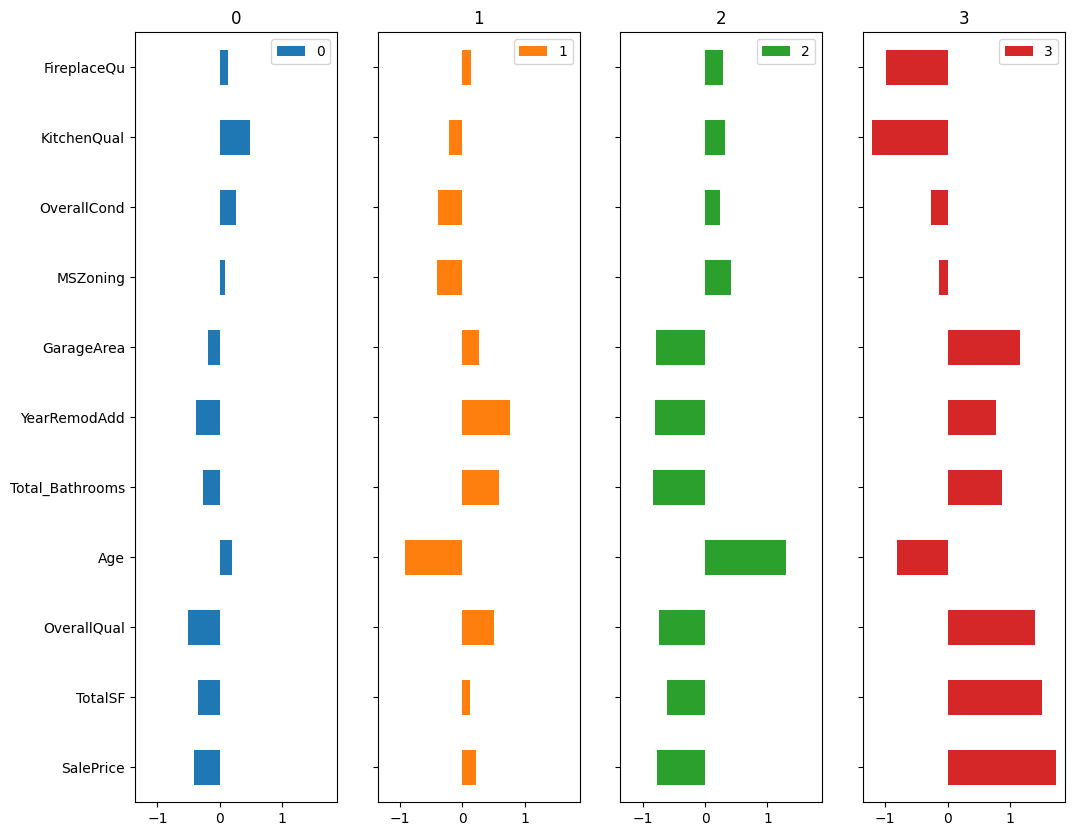

In [140]:
cluster_mean[1:].plot(figsize=(12, 10), kind="barh", subplots=True, layout=(1, 4), sharey=True)

In [141]:
# Ageは大きいほど古い建物ということ
print(train_df_le_dn["Age"].value_counts(sort=True))
print(train_scaled_df["Age"].value_counts(sort=True))

Age
1      98
0      62
4      41
2      39
3      36
       ..
115     1
122     1
128     1
114     1
125     1
Name: count, Length: 122, dtype: int64
Age
-1.178497    98
-1.211504    62
-1.079476    41
-1.145490    39
-1.112483    36
             ..
 2.584298     1
 2.815346     1
 3.013388     1
 2.551291     1
 2.914367     1
Name: count, Length: 122, dtype: int64


## k-meansの結果を考察
- クラスタ0は平均的
- クラスタ1は新しい家で、全体的なクオリティがやや高い
- クラスタ2は古い家で、全体的なクオリティが低く、狭い、低価格
- クラスタ3はクラスタ１ほどではないが新しい家で、キッチン以外のクオリティが高く広くて高価格

## 主成分分析（PCA）

In [142]:
from sklearn.decomposition import PCA

In [143]:
# 各変数の重要度を揃えるため事前に標準化（平均0,分散１にする）が必要
pca = PCA(n_components=2)

In [144]:
house_pca = pca.fit(train_scaled).transform(train_scaled)

In [145]:
house_pca

array([[ 2.76862069, -1.18996307],
       [ 0.51033411, -0.77998563],
       [ 3.38776259, -0.90958781],
       ...,
       [ 1.68014185,  3.6403465 ],
       [-3.09786008, -0.98753796],
       [-0.73384446, -1.19459827]])

In [146]:
house_pca.shape

(1445, 2)

In [147]:
house_pca_df = pd.DataFrame(house_pca)
house_pca_df.columns = ["pca1", "pca2"]

In [148]:
# 元のdfに結合
train_scaled_df = pd.concat([train_scaled_df, house_pca_df], axis=1)

In [149]:
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log,km_cluster,pca1,pca2
0,0.069617,-0.045768,-0.206346,-0.288764,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.387825,-0.325762,-1.046470,0.038930,1.736093,0.4596,0.586795,1,2.768621,-1.189963
1,-0.877169,-0.045768,0.512944,-0.075476,0.058926,0.744525,0.310054,-0.026316,-0.634124,-0.222579,...,0.031995,-0.325762,-0.188288,-0.017716,0.640132,0.4596,0.233882,0,0.510334,-0.779986
2,0.069617,-0.045768,-0.062488,0.230544,0.058926,-1.387256,0.310054,-0.026316,0.601627,-0.222579,...,0.585509,-0.325762,-0.980456,0.227753,1.736093,0.4596,0.763584,1,3.387763,-0.909588
3,0.306313,-0.045768,-0.446109,-0.084750,0.058926,-1.387256,0.310054,-0.026316,-1.869875,-0.222579,...,-0.514930,-0.325762,1.792130,-0.086502,-0.455829,0.4596,-0.426767,2,-1.600446,2.199857
4,0.069617,-0.045768,0.704755,0.788800,0.058926,-1.387256,0.310054,-0.026316,-0.634124,-0.222579,...,0.934750,-0.325762,-0.947449,1.086897,1.736093,0.4596,1.048721,3,5.820248,0.905955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.069617,-0.045768,-0.350204,-0.387617,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.053668,-0.325762,-0.947449,0.084787,0.640132,0.4596,0.141076,1,1.248556,-0.167542
1441,-0.877169,-0.045768,0.752707,0.587568,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.407594,-0.325762,-0.155281,1.453753,0.640132,0.4596,0.605037,0,1.828019,0.827552
1442,0.306313,-0.045768,-0.158393,-0.178967,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.152202,2.854821,1.065977,1.287858,-0.455829,0.4596,1.211364,1,1.680142,3.640347
1443,-0.877169,-0.045768,-0.062488,-0.053777,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.486925,-0.325762,0.768914,-0.514051,-0.455829,0.4596,-0.388431,0,-3.097860,-0.987538


### 主成分分析を可視化

In [150]:
my_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

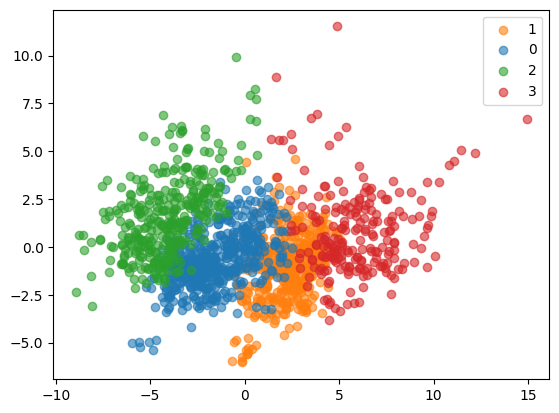

In [151]:
for cl in train_scaled_df["km_cluster"].unique():
    plt.scatter(
        train_scaled_df.loc[train_scaled_df["km_cluster"] == cl, "pca1"],
        train_scaled_df.loc[train_scaled_df["km_cluster"] == cl, "pca2"],
        label=cl,
        c=my_colors[cl],
        alpha=0.6
    )
plt.legend()
plt.show()

In [152]:
# 第一主成分、第二主成分に対して、どの変数が寄与しているか確認
pca_comp_df = pd.DataFrame(pca.components_, columns=train_scaled_df.drop(["km_cluster", "pca1", "pca2"], axis=1).columns).T

In [153]:
pca_comp_df.columns = ["pca1", "pca2"]

In [154]:
pca_comp_df

,pca1,pca2
MSSubClass,-0.007060,-0.045254
MSZoning,-0.066728,0.059814
LotFrontage,0.088558,0.138570
LotArea,0.083435,0.168488
Street,0.009818,0.011055
...,...,...
Age,-0.197376,0.244685
TotalSF,0.216626,0.188468
Total_Bathrooms,0.187905,0.029516
hasPorch,0.090393,0.033079


# 4.12 追加分析2 ハイクラスな家の条件を分析・可視化

以下、高価格な家の条件を決定木を使って可視化する

<Axes: ylabel='Frequency'>

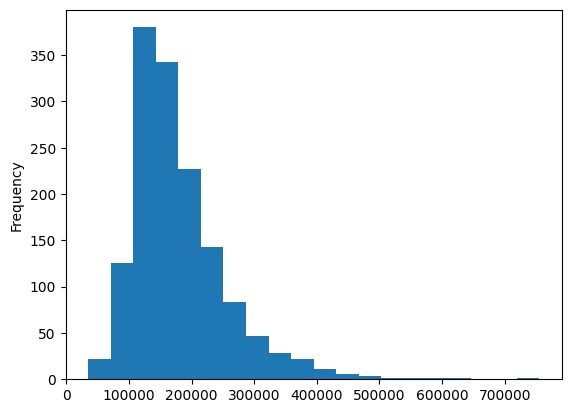

In [155]:
# まずは価格の分布を確認
train_df_le["SalePrice"].plot.hist(bins=20)

In [156]:
train_df_le["SalePrice"].describe()

count      1445.000000
mean     179072.294118
std       75905.045476
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [157]:
# 上位10%をハイクラスな家と定義する
train_df["SalePrice"].quantile(0.9)

278000.0

In [158]:
# ハイクラスを表すカラムを追加
train_df_le.loc[train_df_le["SalePrice"] >= 278000, "high_class"] = 1

/tmp/ipykernel_33/837883746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le.loc[train_df_le["SalePrice"] >= 278000, "high_class"] = 1


In [159]:
train_df_le["high_class"] = train_df_le["high_class"].fillna(0)

/tmp/ipykernel_33/3689103003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le["high_class"] = train_df_le["high_class"].fillna(0)


In [161]:
train_df_le["high_class"].value_counts()

high_class
0.0    1308
1.0     137
Name: count, dtype: int64

LightGBMで重要度の高かった変数に絞って、ハイクラスかどうかを分類する決定木を作る。
これにより単体の決定木においても理解しやすいアウトプットとなる

In [162]:
# 決定木の可視化のため
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=2beafa0d48b32b2c8301de459c0eed12a1e14ca78128556c4732da9e4d5e2d31
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [163]:
from sklearn import tree
import pydotplus
from six import StringIO

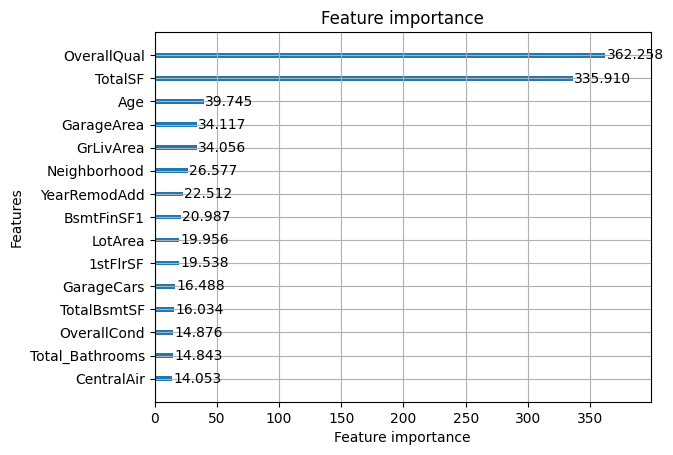

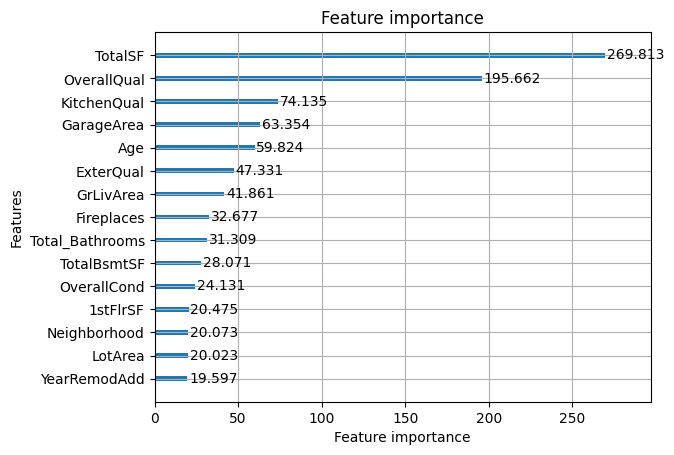

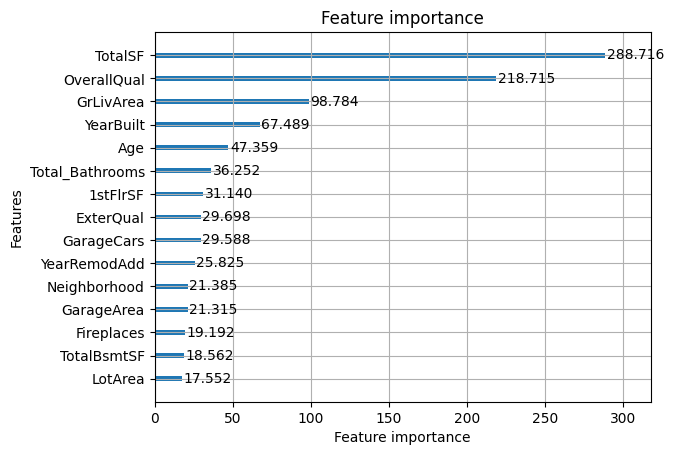

In [165]:
# LightGBMで重要度の高かった変数を確認
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

In [166]:
tree_x = train_df_le[["TotalSF", "OverallQual", "Age", "GrLivArea", "GarageCars", "Total_Bathrooms", "GarageType", "YearRemodAdd", "GarageArea", "CentralAir", "MSZoning", "OverallCond", "KitchenQual","FireplaceQu","1stFlrSF"]]
tree_y = train_df_le["high_class"]

In [167]:
# 簡略化のため木の深さを4とする
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(tree_x, tree_y)

In [168]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=tree_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data. getvalue())

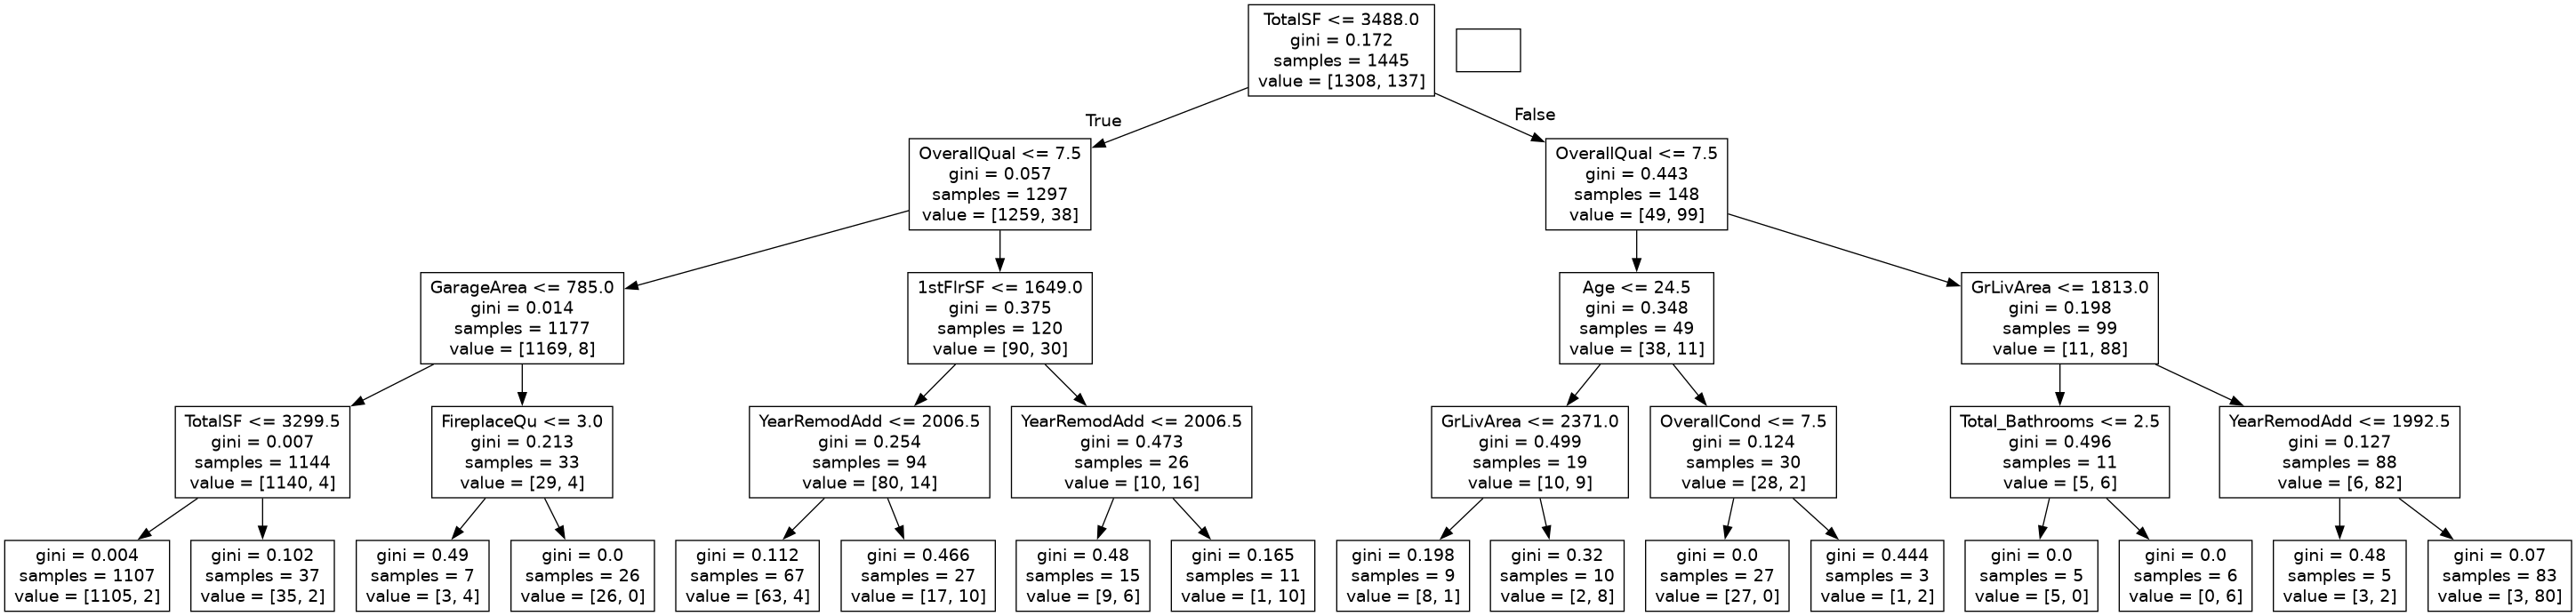

In [169]:
from IPython.display import Image
Image(graph.create_png())

In [170]:
# value=[a,b] のbが、high_class=1のサンプル数
result = 80+2+6+2+8+1+10+6+10+4+4+2+2
print(result)

137


### 決定木からわかるハイクラスな家の条件
- 広くてクオリティが高く比較的最近リフォームした家
    - TotalSFが3489以上、OverallQualが8以上、GrLivAreaが1814以上、YearRemodAddが1993以上
    - TotalSFが3489以下、OverallQualが8以上、1stFlrSFが1650以上、YearRemodAddが2007以上